<a href="https://colab.research.google.com/github/hayannn/AIFFEL_MAIN_QUEST/blob/main/FDSProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신용거래 이상탐지 데이터
- Feature Engineering을 바탕으로 한 나만의 Feature 만들기

> #### 🚨Code Function은 다음 파일을 참고해주세요!🚨
(파일 용량으로 인해 별도 py 파일은 업로드하지 않을 예정입니다.)
- [FDSCodeFunction.ipynb](https://github.com/hayannn/AIFFEL_MAIN_QUEST/blob/main/MainQuest02/FDSProject/241104/CodeFunction/FDSCodeFunction.ipynb)
- [FDSPreFunction.ipynb](https://github.com/hayannn/AIFFEL_MAIN_QUEST/blob/main/MainQuest02/FDSProject/241104/CodeFunction/FDSPreFunction.ipynb)



## 1. 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [101]:
fraud_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS_1104/fraud.csv')

## 2. 데이터 기본 정보 파악하기
- 491134 rows × 22 columns
- 컬럼 정보 정리
  - `trans_date_trans_time` : 거래 일시(object)
  - `cc_num` : credit card 번호 (int)
  - `merchant` : 거래 상인 (object)
  - `category` : 거래 카테고리 (object)
  - `amt` : 거래 금액 (float)
  - `first` : 이름 (object)
  - `last` : 성 (object)
  - `gender` : 성별 (object)
  - `street`: 주소 (object)
  - `city` : 도시 (object)
  - `state` : 주 (object)
  - `zip` : 우편번호 (int)
  - `lat` : 위도 (float)
  - `long` : 경도 (float)
  - `city_pop` : 도시 인구 수 (int)
  - `job` : 사용자 직업 (object)
  - `dob` : 생년월일 (object)
  - `trans_num` : 거래 번호 (object)
  - `unix_time` : 거래 시간 Unix 타임스탬프 (int)
  - `merch_lat` : 상점 위도 (float)
  - `merch_long` : 상점 경도 (float)
  - `is_fraud`: 사기 거래 여부 (int)

In [102]:
pd.set_option('display.max_columns', 50)

In [103]:
fraud_df.head(20)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
5,2019-01-01 00:26:22,3598215285024754,fraud_Heidenreich PLC,grocery_pos,207.36,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,f246ac27c09429ff1e385d4683c79c4d,1325377582,40.202538,-73.859212,0
6,2019-01-01 00:27:45,213141712584544,fraud_Halvorson Group,misc_pos,181.35,Margaret,Curtis,F,742 Oneill Shore,Florence,MS,39073,32.1530,-90.1217,19685,Fine artist,1984-12-24,7bb25a43205191eb7344282b88fc54d3,1325377665,31.939812,-90.726209,0
7,2019-01-01 00:30:49,676372984911,"fraud_Christiansen, Goyette and Schamberger",gas_transport,53.60,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,KS,66941,39.7562,-98.4462,242,Tourism officer,1987-07-18,f1566e9623814dd277dfa2a9bf83ea36,1325377849,40.332519,-99.062962,0
8,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,UT,84540,38.9999,-109.6150,46,"Surveyor, minerals",1987-04-23,47238da5b40d126c8abea40a857c7809,1325377911,39.807313,-109.348294,0
9,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,WA,98238,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,1325378050,48.682111,-122.719904,0


### 필요하지 않은 컬럼은 뭐가 있을까?
- 사기 거래 여부 분석에 필요하지 않은 것
  - 카드 이용자를 구분할 수 있는 고유 정보 1-2개 정도만 남기고 불필요한 정보들을 사용하지 않아도 됨!

<br>

- 삭제하고자 하는 컬럼
  - `first`, `last` : 사용자 고유의 카드 번호가 이미 있기 때문에 불필요
  - `street`, `city`, `state`, `zip`, `job` : 이 역시 사용자를 구분할 수 있는 변수가 이미 있기 때문에 불필요
  
---

## 3. 불필요한 컬럼 제거하기

In [104]:
pd.Series(fraud_df.columns)

,0
0,trans_date_trans_time
1,cc_num
2,merchant
3,category
4,amt
5,first
6,last
7,gender
8,street
9,city


In [105]:
# 컬럼 번호로 지정
columns_to_drop = [5, 6, 8, 9, 10, 11, 15]

In [106]:
# 컬럼 제거
fraud_df = fraud_df.drop(fraud_df.columns[columns_to_drop], axis=1)

In [107]:
# 컬럼 제거 확인
pd.Series(fraud_df.columns)

,0
0,trans_date_trans_time
1,cc_num
2,merchant
3,category
4,amt
5,gender
6,lat
7,long
8,city_pop
9,dob


++ 추가 : unix_time도 제거하자!
- 이미 거래 일시 및 거래 번호에 대한 내용이 있기 때문에 불필요

In [19]:
columns_to_drop = [11]
fraud_df = fraud_df.drop(fraud_df.columns[columns_to_drop], axis=1)

In [20]:
# 컬럼 제거 재확인
pd.Series(fraud_df.columns)

,0
0,trans_date_trans_time
1,cc_num
2,merchant
3,category
4,amt
5,gender
6,lat
7,long
8,city_pop
9,dob


## 4. 결측치 처리하기
- 종속변수와 독립변수를 파악하고, 그에 맞게 결정하려 했으나, 데이터 기본 정보 상에서 이미 결측치가 없음을 파악할 수 있음.

<br>

- 사기 거래 여부를 파악할 수 있는 컬럼이 종속변수일 것!
  - 즉, `is_fraud` 컬럼이 종속변수임.
  - 그 이외의 모든 컬럼은 독립변수임을 알 수 있음.


In [26]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   gender                 491134 non-null  object 
 6   lat                    491134 non-null  float64
 7   long                   491134 non-null  float64
 8   city_pop               491134 non-null  int64  
 9   dob                    491134 non-null  object 
 10  trans_num              491134 non-null  object 
 11  merch_lat              491134 non-null  float64
 12  merch_long             491134 non-null  float64
 13  is_fraud               491134 non-null  int64  
dtypes: float64(5), int64(3), object(6)
m

In [21]:
# 결측치를 개수로 확인
fraud_df.isna().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
gender,0
lat,0
long,0
city_pop,0
dob,0


In [23]:
# 결측치를 평균으로 확인
fraud_df.isna().mean()

,0
trans_date_trans_time,0.0
cc_num,0.0
merchant,0.0
category,0.0
amt,0.0
gender,0.0
lat,0.0
long,0.0
city_pop,0.0
dob,0.0


## 5. 이상치 처리하기
- describe 결과, amt 값에서 의심되는 수치 발견
  - 시각화해서 살펴보기.

In [108]:
fraud_df.describe()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


<Axes: xlabel='None', ylabel='amt'>

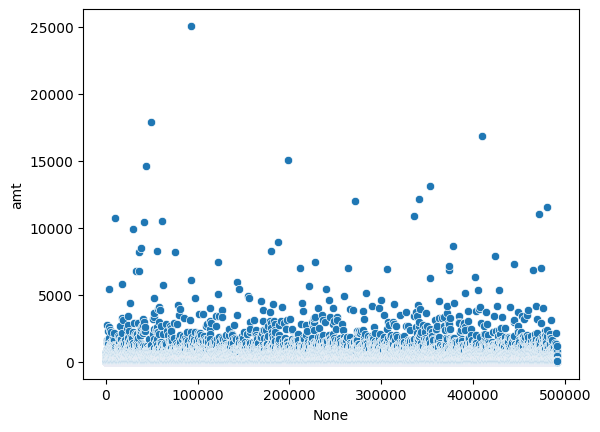

In [32]:
# 시각화
import matplotlib.pyplot as plt

sns.scatterplot(x = fraud_df.index, y = fraud_df['amt'])

- 달러를 기준으로 했을 때, 일시 거래를 25,000달러 즉 한화로 약 3천 400만원 가량 되는 거래를 한 것이 정상적인 것인지 의심.
  - 또한, 사기 거래 여부와 관계를 살펴보니, 주 데이터는 최대 15,000 달러 안의 범위에서 사기 거래였던 건이 존재하는 것으로 파악 -> 20,000달러가 넘는 거래는 이상치가 맞음!
- 타 거래 수치를 미루어 봤을 때, 20,000 달러 이상의 거래는 이상치로 간주할 수 있을 것으로 보아 제거.

<Axes: xlabel='amt', ylabel='is_fraud'>

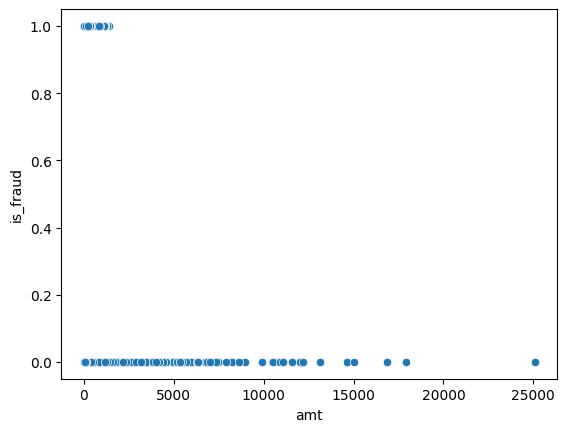

In [33]:
# amt의 이상치 값이 사기 거래 여부와 관계가 있는지 파악해보기
sns.scatterplot(x = fraud_df['amt'], y = fraud_df['is_fraud'])

- 간단한 코드로 제거할 수도 있겠지만, IQR을 이용해 제거하는 연습하기!

In [109]:
# Q1 및 Q3 계산
Q1 = fraud_df['amt'].quantile(0.25)
Q3 = fraud_df['amt'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 정하기
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 행 제거 및 적용하기
outliers = (fraud_df['amt'] < lower_bound) | (fraud_df['amt'] > upper_bound)
fraud_df = fraud_df[~outliers]

<Axes: xlabel='None', ylabel='amt'>

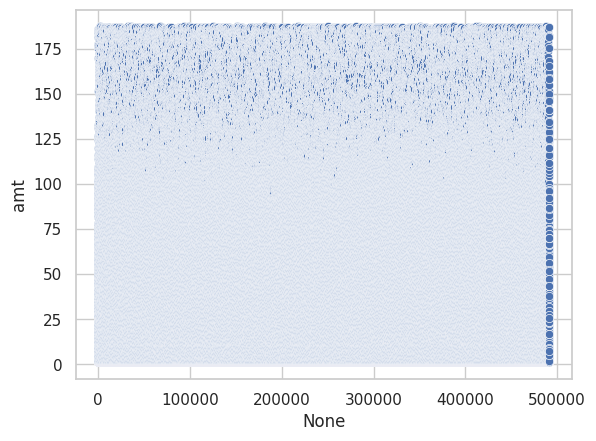

In [110]:
sns.scatterplot(x = fraud_df.index, y = fraud_df['amt'])

In [111]:
# amt의 평균과 표준편차 값, max 값으로 이상치가 제거되었음을 알 수 있음.
fraud_df.describe()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.563340e+05,456334.000000,456334.000000,456334.000000,4.563340e+05,4.563340e+05,456334.000000,456334.000000,456334.000000
mean,3.716488e+17,46.410078,37.976169,-90.439482,1.180506e+05,1.358756e+09,37.975144,-90.439196,0.000863
std,1.261524e+18,43.129865,5.333455,12.952800,3.660691e+05,1.819777e+07,5.365360,12.966190,0.029371
min,5.038744e+11,1.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.350000,33.746700,-97.235100,1.089000e+03,1.343131e+09,33.820418,-96.947828,0.000000
50%,3.531130e+15,36.890000,38.789700,-87.591700,5.621000e+03,1.357296e+09,38.585822,-87.518838,0.000000
75%,4.653879e+15,70.210000,41.520500,-80.462600,5.048900e+04,1.374680e+09,41.656358,-80.646994,0.000000
max,4.956829e+18,187.380000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


## 6. 새로운 Feature 만들기
- [1] 거래 시간 관련 feature 추가해보기
  - `trans_hour`
    - 거래가 발생한 "시간대"를 표시할 수 있다면, 사기 거래가 집중되는 시간대를 예측해볼 수 있을 것으로 예상
  - `trans_day`
    - 거래 요일도 추가
  - `category_hour`
    - 또한, 거래 카테고리가 무엇인지도 같이 표시할 수 있다면 카테고리별 시간대 분석도 가능할 것으로 보임.

<br>

- [2] 거리 관련 feature 추가해보기
  - `actual_distance`
    - 거래 발생 위치와 거래 상점 간의 실제 거리를 계산하면 -> 사기 거래일 가능성을 예측하는 데에 도움이 될 것으로 보임.
    - 거래 발생 위치와 거래 상점 간 거리가 비정상적으로 멀 경우 -> 사기 거래일 가능성이 높기 때문. (ex. 해외 결제 등)

<br>

- [3] 거래 금액 및 인구 수를 이용한 feature 추가로 사기 거래 가능성 예측해보기
  - `amt_per_citypop`
    - 거래 금액을 도시 인구 수로 나누어 계산
    - 인구 수 대비 비정상적으로 높은 거래가 있는지 확인 -> 사기 거래일 가능성 예측에 도움이 될 것으로 보임.

<br>

- [4] 나이 정보 feature 추가해보기
  - `age`
    - 생년월일 컬럼이 있기 때문에 이를 이용해 나이 정보를 가져올 수 있음.
    - 특정 나이대에 사기 거래가 집중될 가능성을 파악할 수 있어 도움이 될 것으로 보임.

### [1] 거래 시간 관련 feature 추가해보기
- 코드 참고 : [python | geopy 라이브러리를 사용하여 두 좌표간 거리 구하기](https://dduniverse.tistory.com/entry/python-geopy-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EC%97%AC-%EB%91%90-%EC%A2%8C%ED%91%9C%EA%B0%84-%EA%B1%B0%EB%A6%AC-%EA%B5%AC%ED%95%98%EA%B8%B0)

In [112]:
# 1. trans_hour, trans_day, category_hour
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])
fraud_df['trans_hour'] = fraud_df['trans_date_trans_time'].dt.hour
fraud_df['trans_day'] = fraud_df['trans_date_trans_time'].dt.dayofweek
fraud_df['category_hour'] = fraud_df['category'].astype(str) + '_' + fraud_df['trans_hour'].astype(str)

In [113]:
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_hour
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,grocery_pos_0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,0,1,grocery_pos_0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,0,1,grocery_net_0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,0,1,grocery_pos_0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,0,1,misc_pos_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,23,3,home_23
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,23,3,shopping_pos_23
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,3,kids_pets_23
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,3,kids_pets_23


- 시간대를 기준으로 했을 때, 주로 오후 시간대(점심 이후)에 집중되어 거래가 발생함을 알 수 있음.

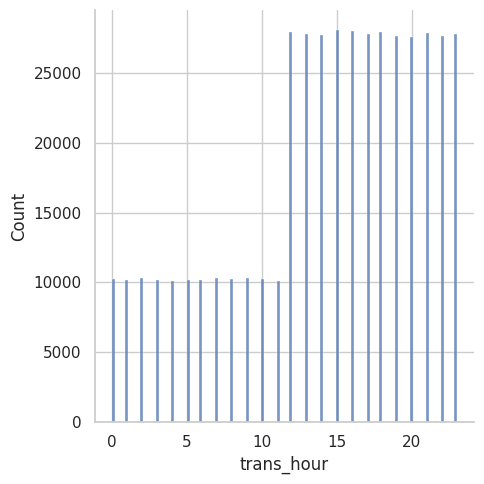

In [114]:
sns.displot(fraud_df['trans_hour'])

- 요일을 기준으로 했을 때, 일요일과 월요일의 거래가 가장 많은 것으로 파악됨.
  - 즉, 주로 일요일과 월요일의 오후 시간대에 거래가 집중됨을 파악!

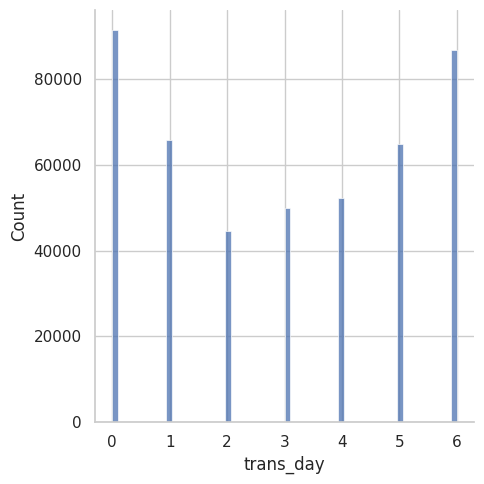

In [115]:
sns.displot(fraud_df['trans_day'])

---

### [2] 거리 관련 feature 추가해보기

- 거리 관련 피쳐의 경우, pickle로 저장해두기

In [116]:
from geopy.distance import geodesic

def calculate_distance(row):
    user_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return geodesic(user_location, merchant_location).kilometers

fraud_df['actual_distance'] = fraud_df.apply(calculate_distance, axis=1)

In [117]:
# 결과 확인
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_hour,actual_distance
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,grocery_pos_0,30.216618
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,0,1,grocery_pos_0,84.714605
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,0,1,grocery_net_0,67.768167
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,0,1,grocery_pos_0,22.322745
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,0,1,misc_pos_0,79.398244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,23,3,home_23,98.043837
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,23,3,shopping_pos_23,127.240424
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,3,kids_pets_23,100.023736
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,3,kids_pets_23,80.887812


In [118]:
fraud_df.to_pickle('/content/drive/MyDrive/Colab Notebooks/FDS_1104/actual_distance.pkl')

- 이 컬럼을 이용해 해외 거래 등의 거래 이상 징후를 파악하는 데 빠르게 사용할 수 있을 것으로 예측!

<Axes: xlabel='None', ylabel='actual_distance'>

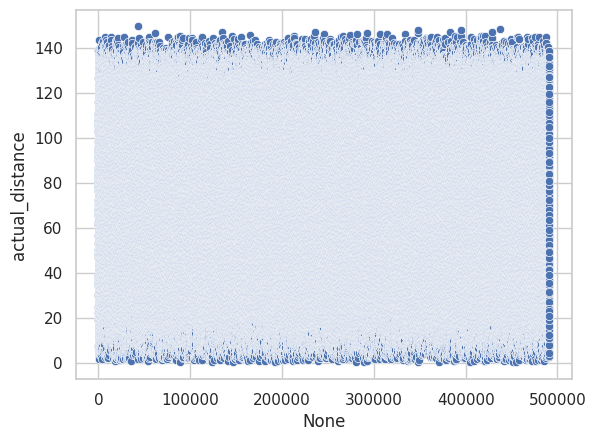

In [119]:
sns.scatterplot(x = fraud_df.index, y = fraud_df['actual_distance'])

---

### [3] 거래 금액 및 인구 수를 이용한 feature 추가로 사기 거래 가능성 예측해보기

In [120]:
fraud_df['amt_per_citypop'] = fraud_df['amt'] / fraud_df['city_pop']

In [121]:
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,grocery_pos_0,30.216618,0.719664
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,0,1,grocery_pos_0,84.714605,0.000358
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,0,1,grocery_net_0,67.768167,0.000647
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,0,1,grocery_pos_0,22.322745,0.002034
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,0,1,misc_pos_0,79.398244,0.000068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,23,3,home_23,98.043837,0.000721
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,23,3,shopping_pos_23,127.240424,0.016737
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,3,kids_pets_23,100.023736,0.003892
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,3,kids_pets_23,80.887812,0.023583


- 해당 컬럼을 이용해 인구 수 대비 거래 건 수가 특이하게 많은 데이터를 찾아낼 수 있고, 이를 통해 그 데이터가 사기 거래인 것인지 여부를 파악할 수 있을 것!

<Axes: xlabel='city_pop', ylabel='amt_per_citypop'>

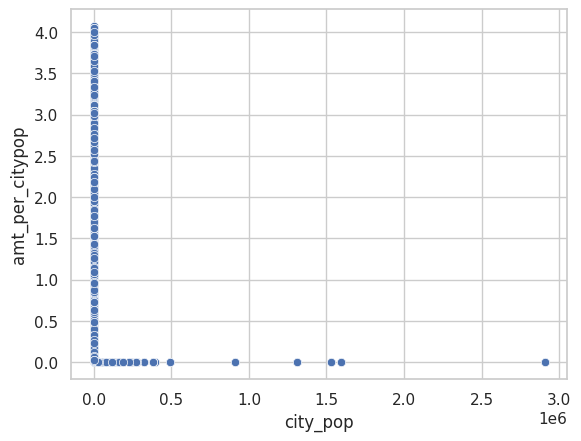

In [122]:
sns.scatterplot(x = fraud_df['city_pop'], y = fraud_df['amt_per_citypop'])

---

### [4] 나이 정보 feature 추가해보기
- 사기 거래에 특정한 나이대가 집중되어있는지 여부를 파악하기 위함.
- 만약, 데이터가 집중되어 있다면 특정 나이대를 중심으로 데이터를 더 빠르게 살펴 사기 거래를 걸러낼 수 있을 것.

In [123]:
from datetime import datetime

fraud_df['dob'] = pd.to_datetime(fraud_df['dob'])
fraud_df['age'] = fraud_df['trans_date_trans_time'].dt.year - fraud_df['dob'].dt.year

In [124]:
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop,age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,grocery_pos_0,30.216618,0.719664,41
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,0,1,grocery_pos_0,84.714605,0.000358,39
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,0,1,grocery_net_0,67.768167,0.000647,45
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,0,1,grocery_pos_0,22.322745,0.002034,48
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,0,1,misc_pos_0,79.398244,0.000068,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,23,3,home_23,98.043837,0.000721,37
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,23,3,shopping_pos_23,127.240424,0.016737,36
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,3,kids_pets_23,100.023736,0.003892,21
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,3,kids_pets_23,80.887812,0.023583,39


<Axes: xlabel='trans_hour', ylabel='age'>

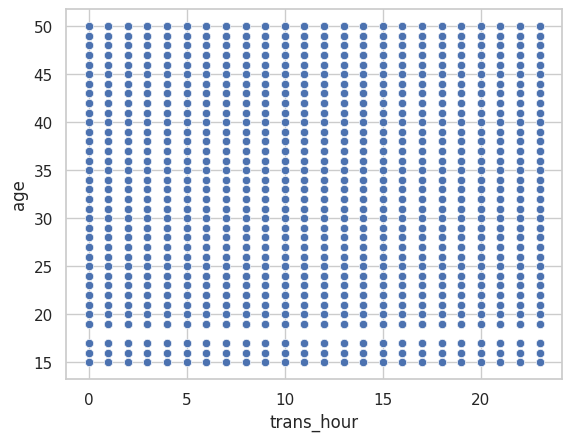

In [125]:
sns.scatterplot(x = fraud_df['trans_hour'], y = fraud_df['age'])

<Axes: xlabel='gender', ylabel='age'>

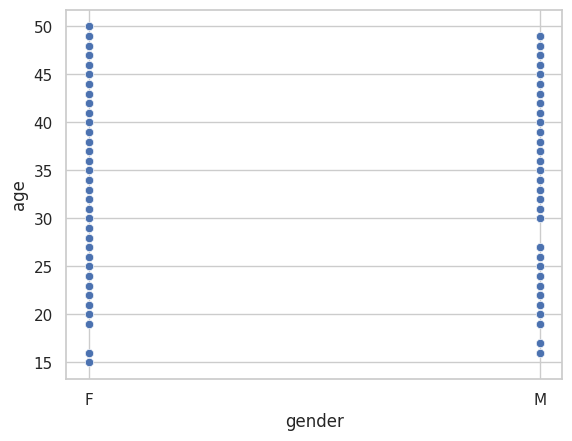

In [126]:
sns.scatterplot(x = fraud_df['gender'], y = fraud_df['age'])

<Axes: xlabel='is_fraud', ylabel='age'>

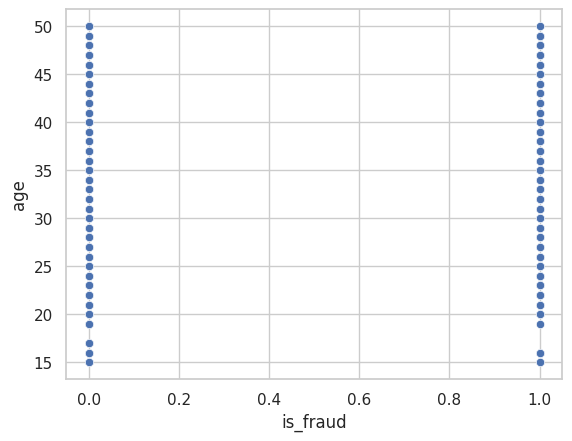

In [127]:
sns.scatterplot(x = fraud_df['is_fraud'], y = fraud_df['age'])

- 전체적으로 나이대로는 사기 거래 여부를 파악하기에는 현재 데이터로는 한계가 있어 보임.
  - 고르게 분포하고 있어 특정하게 몰려있지 않기 때문.

---

## 7. 통계적 관점에서 새로운 변수를 생성
- `amt_ratio`
  - 각 사용자별 평균 거래 금액 계산 -> 비율로 변환
  - 평균 거래 금액보다 크게 발생되는 거래 금액이 있을 경우 -> 사기 거래일 가능성이 매우 높아질 수 있으니 해당 feature를 추가

<br>

- `trans_count`
  - 사용자의 거래 횟수를 누적
  - 거래 빈도가 높은 것 자체는 문제가 된다고 볼 수는 없겠지만 -> 거래 빈도가 급격하게 높아지는 경우 사기 징후일 가능성이 있기 때문!

In [128]:
# amt_ratio
fraud_df['amt_ratio'] = fraud_df.groupby('cc_num')['amt'].transform(lambda x: x / x.mean())

In [129]:
# trans_count
fraud_df['trans_count'] = fraud_df.groupby('cc_num').cumcount() + 1

In [130]:
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop,age,amt_ratio,trans_count
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,grocery_pos_0,30.216618,0.719664,41,2.614423,1
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,0,1,grocery_pos_0,84.714605,0.000358,39,1.056551,1
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,0,1,grocery_net_0,67.768167,0.000647,45,0.850281,1
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,0,1,grocery_pos_0,22.322745,0.002034,48,1.547211,1
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,0,1,misc_pos_0,79.398244,0.000068,42,0.470610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,23,3,home_23,98.043837,0.000721,37,2.497493,3777
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,23,3,shopping_pos_23,127.240424,0.016737,36,0.597260,4246
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,3,kids_pets_23,100.023736,0.003892,21,3.253487,3543
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,3,kids_pets_23,80.887812,0.023583,39,1.578980,3127


## 추가. 원핫인코딩 적용
- category 컬럼의 경우, 원핫인코딩이 필요
  - category 컬럼으로 거래 카테고리별 시간대 분석을 진행했기 때문에, 불필요한 컬럼이 과도하게 생길 수 있다는 단점이 생김.
  - 그럼에도 원핫 인코딩 정보를 활용하기 위해 실행!

In [131]:
fraud_df = pd.get_dummies(fraud_df, columns=['category'], drop_first=True)

In [132]:
fraud_df

,trans_date_trans_time,cc_num,merchant,amt,gender,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop,age,amt_ratio,trans_count,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,F,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,grocery_pos_0,30.216618,0.719664,41,2.614423,1,False,False,False,True,False,False,False,False,False,False,False,False,False
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",44.71,M,40.6747,-74.2239,124967,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,0,1,grocery_pos_0,84.714605,0.000358,39,1.056551,1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,46.28,F,40.6152,-74.4150,71485,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,0,1,grocery_net_0,67.768167,0.000647,45,0.850281,1,False,False,True,False,False,False,False,False,False,False,False,False,False
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,64.09,M,42.2203,-83.3583,31515,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,0,1,grocery_pos_0,22.322745,0.002034,48,1.547211,1,False,False,False,True,False,False,False,False,False,False,False,False,False
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,25.58,F,30.4066,-91.1468,378909,1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,0,1,misc_pos_0,79.398244,0.000068,42,0.470610,1,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,134.26,F,34.2651,-77.8670,186140,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,23,3,home_23,98.043837,0.000721,37,2.497493,3777,False,False,False,False,False,True,False,False,False,False,False,False,False
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",25.49,F,34.0326,-82.2027,1523,1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,23,3,shopping_pos_23,127.240424,0.016737,36,0.597260,4246,False,False,False,False,False,False,False,False,False,False,False,True,False
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,111.84,M,29.0393,-95.4401,28739,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,3,kids_pets_23,100.023736,0.003892,21,3.253487,3543,False,False,False,False,False,False,True,False,False,False,False,False,False
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,86.88,F,46.1966,-118.9017,3684,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,3,kids_pets_23,80.887812,0.023583,39,1.578980,3127,False,False,False,False,False,False,True,False,False,False,False,False,False


## 8. Feature 추가로 인해 불필요해진 컬럼 추가 제거
- `city_pop` : 인구 수 대비 거래 비율 계산을 마쳤기 때문에 제거
- 그 이외의 값들은 유지
  - 위경도 값의 경우, 거리 계산을 했기 때문에 없애도 되는 것이 아닐까? 생각했으나..
    - 추후, 해당 데이터를 이용하여 고객 거래 패턴을 분석하거나 위치를 기반으로 하여 모델을 만들게 된다면 해당 정보가 필요할 것으로 보임.
    - geocode 등을 이용하면 주소 정보(상점 이름)로 위경도값을 다시 빼낼 수는 있음. 그러나 불필요한 작업으로 예상되어 위경도 값을 남기는 것으로 결정.

In [133]:
pd.Series(fraud_df.columns)

,0
0,trans_date_trans_time
1,cc_num
2,merchant
3,amt
4,gender
5,lat
6,long
7,city_pop
8,dob
9,trans_num


In [134]:
columns_to_drop = [7]
fraud_df = fraud_df.drop(fraud_df.columns[columns_to_drop], axis=1)

In [135]:
pd.Series(fraud_df.columns)

,0
0,trans_date_trans_time
1,cc_num
2,merchant
3,amt
4,gender
5,lat
6,long
7,dob
8,trans_num
9,unix_time


## final. 컬럼 이름 변경
- 기존 컬럼을 유지하며 계속 변환한 이유 : 데이터 내용에 대한 이해가 부족한 상태로 컬럼명을 변경하면, 함수 구현에 어려움이 있을 것으로 생각되어 빠르게 구현하기 위해 마지막에 컬럼명을 변경하는 것으로 구성.

<br>

- 변경할 컬럼
  - `trans_date_trans_time` -> `trans_date_time`
  - `cc_num` -> `credit_card_num`
  - `lat` -> `user_lat`
  - `long` -> `user_long`
  - `dob` -> `birth`

In [136]:
# 컬럼 이름 변경 함수 작성
def rename_cols(column_name):
  column_name = column_name.lower()
  column_name = column_name.replace(' ', '_')

  replacements = {
        'trans_date_trans_time': 'trans_date_time',
        'cc_num': 'credit_card_num',
        'lat': 'user_lat',
        'long': 'user_long',
        'dob': 'birth'
    }

  for old, new in replacements.items():
    column_name = column_name.replace(old, new)

  return column_name

In [137]:
# 적용
fraud_df.columns = [rename_cols(col) for col in fraud_df.columns]

In [138]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456334 entries, 0 to 491133
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date_time          456334 non-null  datetime64[ns]
 1   credit_card_num          456334 non-null  int64         
 2   merchant                 456334 non-null  object        
 3   amt                      456334 non-null  float64       
 4   gender                   456334 non-null  object        
 5   user_lat                 456334 non-null  float64       
 6   user_long                456334 non-null  float64       
 7   birth                    456334 non-null  datetime64[ns]
 8   trans_num                456334 non-null  object        
 9   unix_time                456334 non-null  int64         
 10  merch_user_lat           456334 non-null  float64       
 11  merch_user_long          456334 non-null  float64       
 12  is_fraud             

In [139]:
pd.Series(fraud_df.columns)

,0
0,trans_date_time
1,credit_card_num
2,merchant
3,amt
4,gender
5,user_lat
6,user_long
7,birth
8,trans_num
9,unix_time


In [140]:
# 최종 데이터 보기
fraud_df

,trans_date_time,credit_card_num,merchant,amt,gender,user_lat,user_long,birth,trans_num,unix_time,merch_user_lat,merch_user_long,is_fraud,trans_hour,trans_day,category_hour,actual_distance,amt_per_citypop,age,amt_ratio,trans_count,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,F,48.8878,-118.2105,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,grocery_pos_0,30.216618,0.719664,41,2.614423,1,False,False,False,True,False,False,False,False,False,False,False,False,False
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",44.71,M,40.6747,-74.2239,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,0,1,grocery_pos_0,84.714605,0.000358,39,1.056551,1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,46.28,F,40.6152,-74.4150,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,0,1,grocery_net_0,67.768167,0.000647,45,0.850281,1,False,False,True,False,False,False,False,False,False,False,False,False,False
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,64.09,M,42.2203,-83.3583,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,0,1,grocery_pos_0,22.322745,0.002034,48,1.547211,1,False,False,False,True,False,False,False,False,False,False,False,False,False
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,25.58,F,30.4066,-91.1468,1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,0,1,misc_pos_0,79.398244,0.000068,42,0.470610,1,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,134.26,F,34.2651,-77.8670,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,23,3,home_23,98.043837,0.000721,37,2.497493,3777,False,False,False,False,False,True,False,False,False,False,False,False,False
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",25.49,F,34.0326,-82.2027,1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,23,3,shopping_pos_23,127.240424,0.016737,36,0.597260,4246,False,False,False,False,False,False,False,False,False,False,False,True,False
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,111.84,M,29.0393,-95.4401,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,3,kids_pets_23,100.023736,0.003892,21,3.253487,3543,False,False,False,False,False,False,True,False,False,False,False,False,False
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,86.88,F,46.1966,-118.9017,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,3,kids_pets_23,80.887812,0.023583,39,1.578980,3127,False,False,False,False,False,False,True,False,False,False,False,False,False


In [141]:
pd.Series(fraud_df.columns)

,0
0,trans_date_time
1,credit_card_num
2,merchant
3,amt
4,gender
5,user_lat
6,user_long
7,birth
8,trans_num
9,unix_time


## 데이터 추출

In [142]:
fraud_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FDS_1104/final_fraud.csv', index=False)